2D Poisson equation: $\Delta u = f = u_{xx}+u_{yy} + s^2u$ <br> 
x element of [0,1] <br> y element of [0,1] <br>

Discretized equation with 5-point scheme: $\frac{u^{j}_{i-1}-2u^{j}_{i}+u^{j}_{i+1}}{\Delta x^2} + \frac{u^{j-1}_{i}-2u^{j}_{i}+u^{j+1}_{i}}{\Delta y^2} + s^{2j}_{i}u^{j}_{i}
= \delta(x-0.5,y-0.5) $ <br>

The Dirac delta function is evaluated by setting the center point to the random draw if fidelity is odd or setting the center 2x2 grid to the value if it is even. 

$\Delta y = \Delta x$

-> $(4+\Delta x^2 s^{2j}_{i})u^j_i - u^j_{i-1} - u^{j-1}_i - u^j_{i+1} - u^{j+1}_i = \Delta x^2 \delta(x-0.5,y-0.5)$

https://www.davidpublisher.com/Public/uploads/Contribute/5b5a8959b194f.pdf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

In [20]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
import time
import plotly.graph_objects as go

### Emitter binning

Circle defined on $x \times y = [0,1] \times [0,1]$

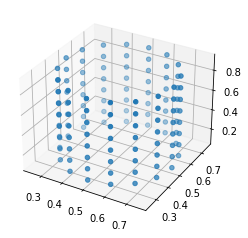

In [19]:
def circle_points(r, n): # Radius, number of points
    t = np.linspace(0, 2*np.pi, n, endpoint=False)
    x = r * np.cos(t)
    y = r * np.sin(t)
    circle = np.c_[x, y]
    return circle+0.5

r = 0.25
n = 16
circle = circle_points(r, n)
z_cyl = np.linspace(0.1,0.9,8)
transducers = np.zeros((len(z_cyl)*len(circle[:,0]), 3))
for i in range(len(z_cyl)):
    for j in range(len(circle[:,0])):
        transducers[i*len(circle[:,0])+j, 0] = circle[j,0]
        transducers[i*len(circle[:,0])+j, 1] = circle[j,1] 
        transducers[i*len(circle[:,0])+j, 2]= z_cyl[i]
    
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(transducers[:,0], transducers[:,1], transducers[:,2], zdir='z')
#plt.axis('equal');

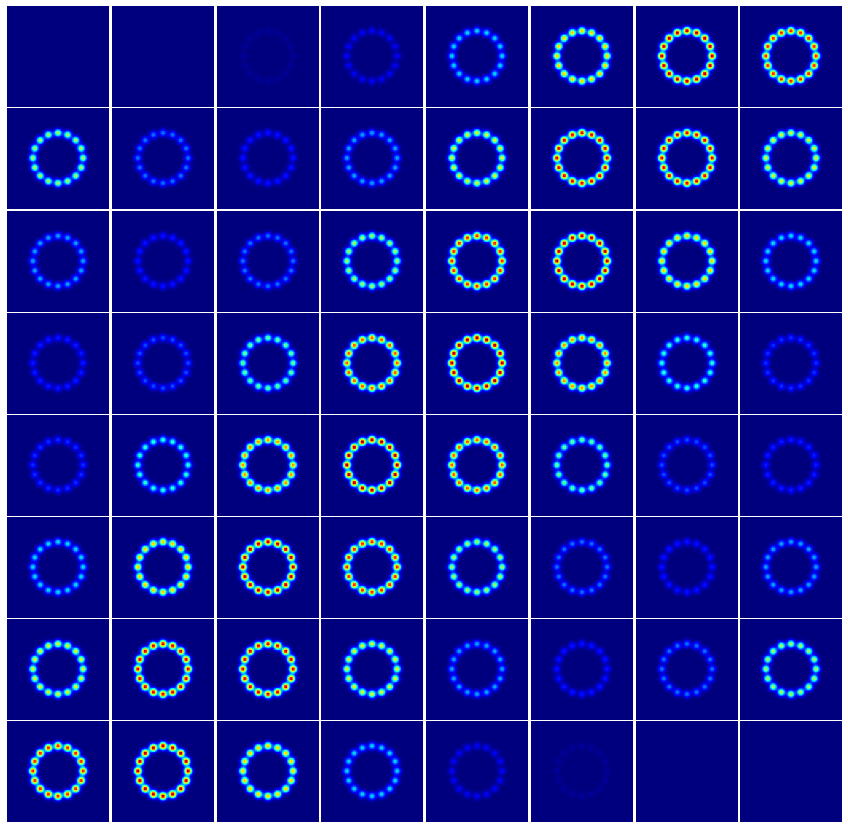

In [47]:
size = 64
sigma_x = 0.025
sigma_y = 0.025
sigma_z = 0.025

x = np.linspace(0, 1, size)
y = np.linspace(0, 1, size)
z = np.linspace(0, 1, size)

x, y, z = np.meshgrid(x, y, z)
u = (1/(2*np.pi*sigma_x*sigma_y*sigma_z) * np.exp(-((x-0.5)**2/(2*sigma_x**2) + (y-0.5)**2/(2*sigma_y**2) + (z-0.5)**2/(2*sigma_z**2))))
vmin = np.min(u); vmax = np.max(u);

u = x*0
for i in range(transducers.shape[0]):
    u_temp = (1/(2*np.pi*sigma_x*sigma_y*sigma_z) * np.exp(-((x-transducers[i,0])**2/(2*sigma_x**2) + (y-transducers[i,1])**2/(2*sigma_y**2) + (z-transducers[i,2])**2/(2*sigma_z**2))))/vmax
    u += u_temp
    
vmin_sum = np.min(u); vmax_sum = np.max(u)   

plt.figure(figsize=(15,15))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(u[:,:,i], cmap='jet', vmin = vmin_sum, vmax = vmax_sum)
    plt.axis('off')
    
plt.subplots_adjust(wspace=.01, hspace=.01)

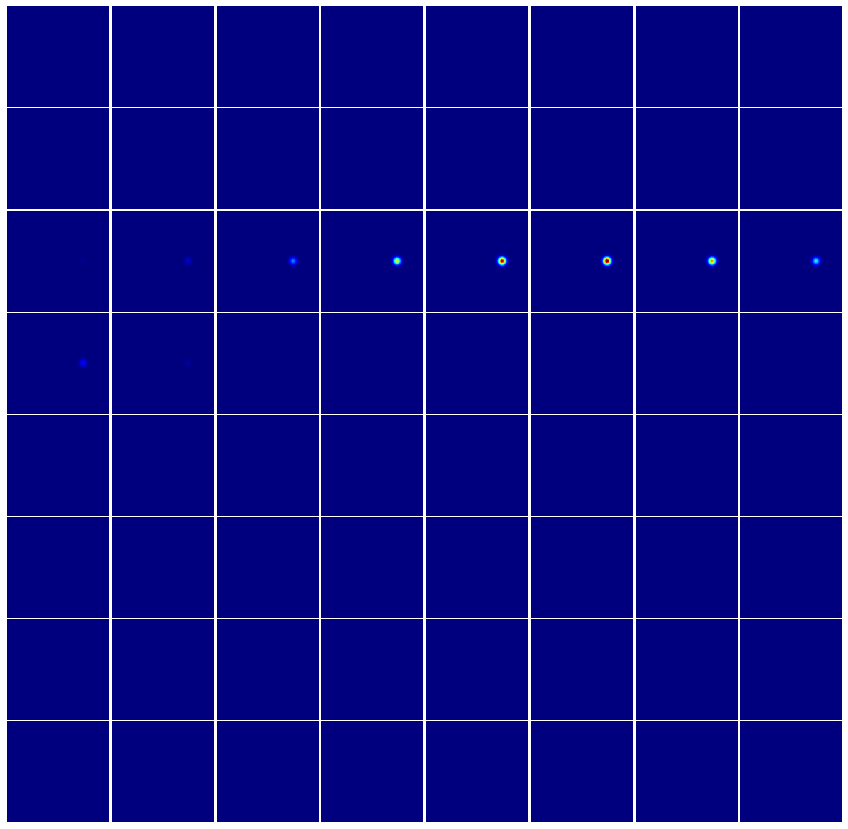

In [45]:
i = 32
u = (1/(2*np.pi*sigma_x*sigma_y*sigma_z) * np.exp(-((x-transducers[i,0])**2/(2*sigma_x**2) + (y-transducers[i,1])**2/(2*sigma_y**2) + (z-transducers[i,2])**2/(2*sigma_z**2))))

plt.figure(figsize=(15,15))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(u[:,:,i], cmap='jet', vmin = vmin, vmax = vmax)
    plt.axis('off')
    
plt.subplots_adjust(wspace=.01, hspace=.01)